# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

- Saya memilih dataset melalui public repositori Kaggle yang berjudul "Game Recommendations on Steam" oleh Anton Kozyriev. Dataset ini memiliki 3 entities, diantaranya games.csv, users.csv, recommendations.csv. Pada kesempatan ini saya hanya menggunakan games.csv yang by record memiliki 50.000 baris. Hal ini tentunya sangat banyak jika semua baris data digunakan, kedepannya saya hanya akan mengambil 5000 baris data untuk submission machine learning ini.
- Terdapat 10 kolom Fitur, dengan campuran tipe data Kategorikal dan Numerikal.

Sumber : https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# dataset_path = 'data/games.csv'
# df = pd.read_csv(dataset_path)

# # Mengambil 5000 data saja
# subdata_df = df.sample(n=5000, random_state=100)
# subdata_path = 'data/subdata.csv'
# subdata_df.to_csv(subdata_path, index=False)

df = pd.read_csv("data/subdata.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,46636,46,Female,USA,Simulation,8.404472,0,Medium,13,80,38,7,Medium
1,31136,21,Female,Asia,Strategy,1.201256,1,Hard,13,39,85,21,Medium
2,17337,30,Female,Other,Action,15.659611,0,Hard,15,67,96,27,Medium
3,14143,41,Male,Other,Strategy,14.405034,1,Medium,18,160,63,36,High
4,47321,23,Female,Europe,RPG,5.412504,0,Medium,5,109,74,28,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   5000 non-null   int64  
 1   Age                        5000 non-null   int64  
 2   Gender                     5000 non-null   object 
 3   Location                   5000 non-null   object 
 4   GameGenre                  5000 non-null   object 
 5   PlayTimeHours              5000 non-null   float64
 6   InGamePurchases            5000 non-null   int64  
 7   GameDifficulty             5000 non-null   object 
 8   SessionsPerWeek            5000 non-null   int64  
 9   AvgSessionDurationMinutes  5000 non-null   int64  
 10  PlayerLevel                5000 non-null   int64  
 11  AchievementsUnlocked       5000 non-null   int64  
 12  EngagementLevel            5000 non-null   object 
dtypes: float64(1), int64(7), object(5)
memory usage:

In [5]:
print(df['rating'].unique())

KeyError: 'rating'

In [34]:
df.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.048544e+06,77.079600,1884.544800,8.436248,8.680356,5.909200
std,6.150053e+05,18.174029,20818.973697,10.872325,11.115015,19.100249
min,2.800000e+02,0.000000,10.000000,0.000000,0.000000,0.000000
25%,5.120700e+05,67.000000,19.000000,0.990000,0.990000,0.000000
50%,9.786700e+05,81.000000,49.000000,4.990000,4.990000,0.000000
75%,1.513448e+06,91.000000,220.000000,10.990000,11.990000,0.000000
max,2.576790e+06,100.000000,985819.000000,199.990000,199.990000,90.000000


In [35]:
df.duplicated().sum()

0

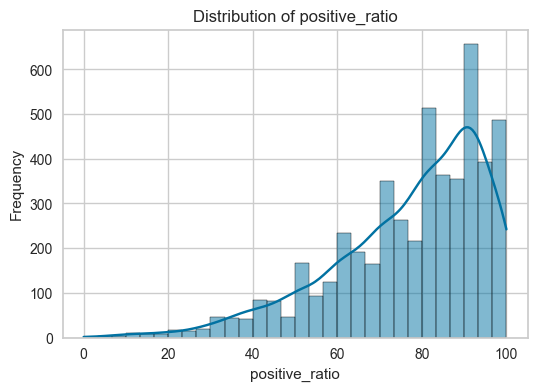

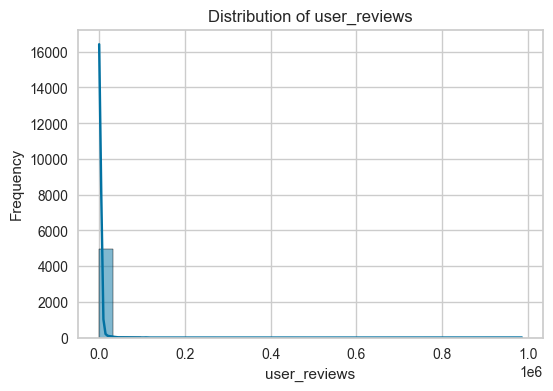

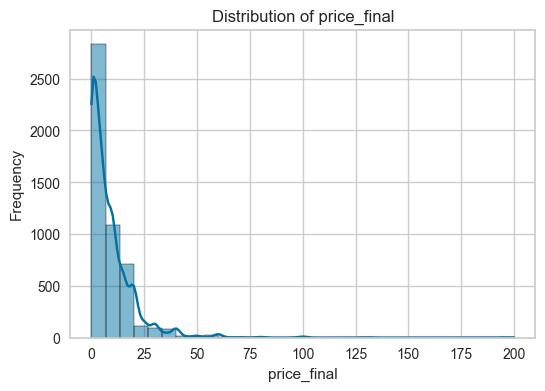

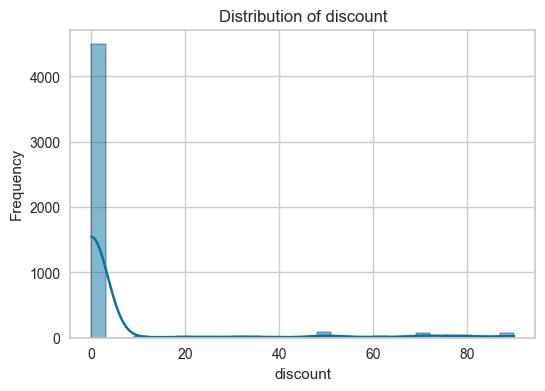

In [36]:
# Distribusi numerik melalui histofram
numerical_columns = ['positive_ratio', 'user_reviews', 'price_final', 'discount']
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


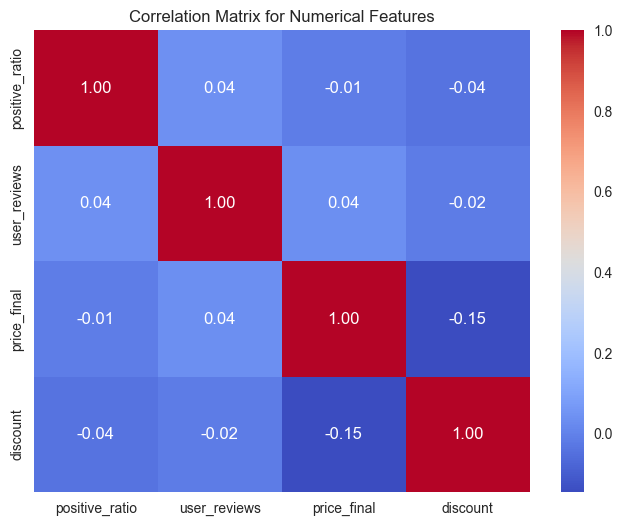

In [37]:
#Correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

C:\Users\Vrooh\AppData\Local\Temp\ipykernel_17712\550580406.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')


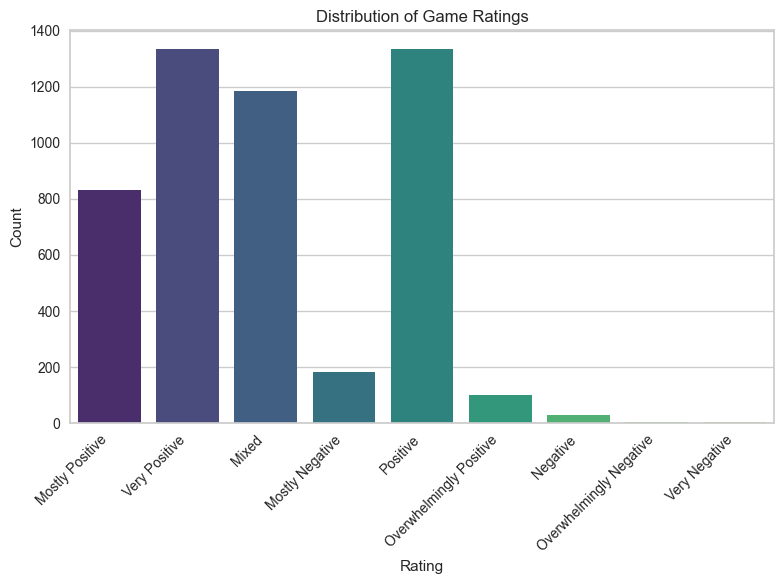

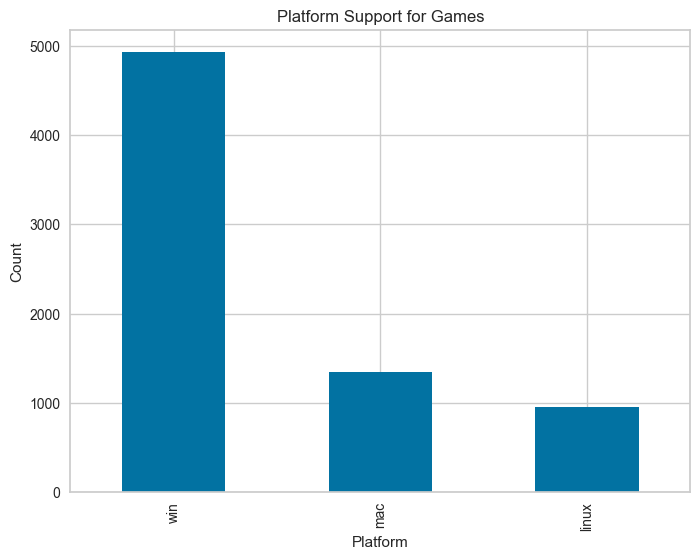

In [38]:
# Distribusi kategori rating
plt.figure(figsize=(8, 6))
# sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Distribution of Game Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Platform
platform_support = df[['win', 'mac', 'linux']].sum()
platform_support.plot(kind='bar', figsize=(8, 6))
plt.title('Platform Support for Games')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [39]:
df['date_release'] = pd.to_datetime(df['date_release'])

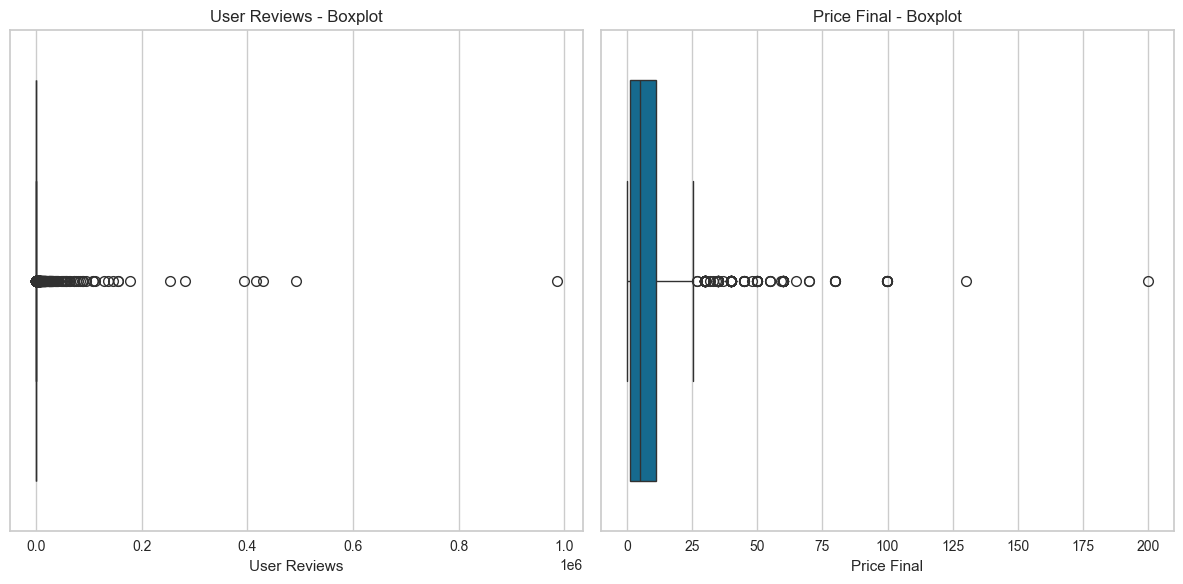

In [40]:
# Visualisasi menggunakan boxplot untuk user_reviews dan price_final
plt.figure(figsize=(12, 6))

# Boxplot untuk user_reviews
plt.subplot(1, 2, 1)
sns.boxplot(x=df['user_reviews'])
plt.title('User Reviews - Boxplot')
plt.xlabel('User Reviews')

# Boxplot untuk price_final
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price_final'])
plt.title('Price Final - Boxplot')
plt.xlabel('Price Final')

plt.tight_layout()
plt.show()

In [41]:
# Fungsi untuk deteksi dan penanganan outliers menggunakan capping
def handle_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Terapkan capping
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

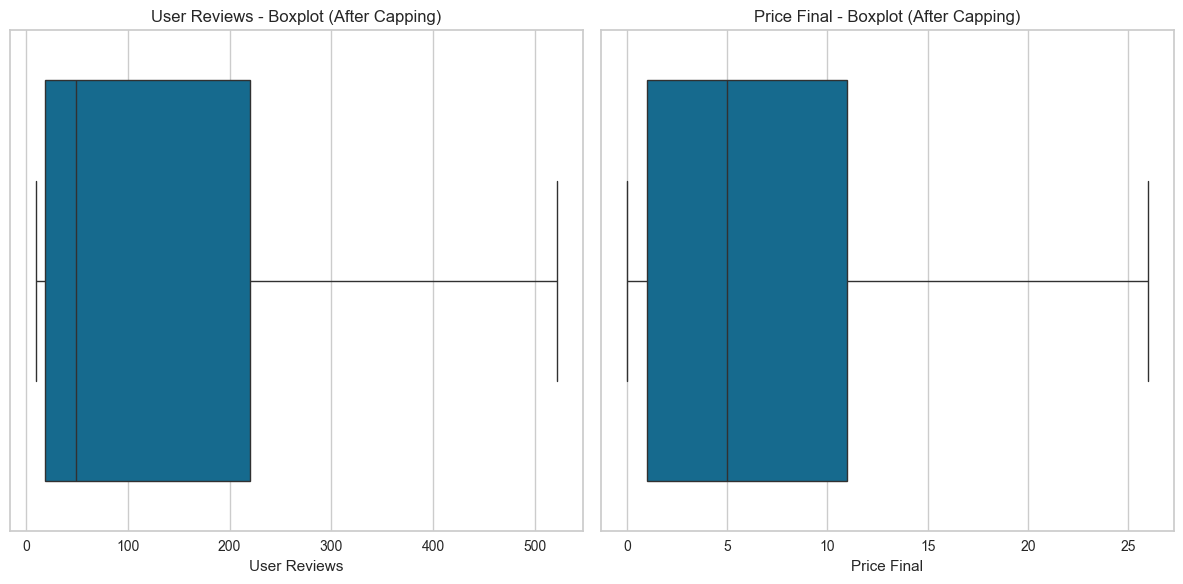

In [42]:
handle_outliers(df, 'user_reviews')
handle_outliers(df, 'price_final')

plt.figure(figsize=(12, 6))

# user_reviews
plt.subplot(1, 2, 1)
sns.boxplot(x=df['user_reviews'])
plt.title('User Reviews - Boxplot (After Capping)')
plt.xlabel('User Reviews')

# price_final
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price_final'])
plt.title('Price Final - Boxplot (After Capping)')
plt.xlabel('Price Final')

plt.tight_layout()
plt.show()

In [43]:
# Daftar kategori rating dengan urutan yang telah diperbaiki
rating_order = ['Overwhelmingly Negative', 'Very Negative', 'Mostly Negative', 
                'Negative', 'Mixed', 'Positive', 'Mostly Positive', 
                'Very Positive', 'Overwhelmingly Positive']

# Inisialisasi OrdinalEncoder dengan kategori yang sudah diatur
oe = OrdinalEncoder(categories=[rating_order])

# Terapkan OrdinalEncoder untuk kolom rating
df['rating_encoded'] = oe.fit_transform(df[['rating']]) + 1  # Menambahkan 1 agar nilai tidak dimulai dari 0

# Menampilkan beberapa baris pertama untuk memeriksa hasil
print(df[['rating', 'rating_encoded']].head())


            rating  rating_encoded
0  Mostly Positive             7.0
1  Mostly Positive             7.0
2    Very Positive             8.0
3            Mixed             5.0
4    Very Positive             8.0


In [44]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app_id          5000 non-null   int64         
 1   title           5000 non-null   object        
 2   date_release    5000 non-null   datetime64[ns]
 3   win             5000 non-null   bool          
 4   mac             5000 non-null   bool          
 5   linux           5000 non-null   bool          
 6   rating          5000 non-null   object        
 7   positive_ratio  5000 non-null   int64         
 8   user_reviews    5000 non-null   float64       
 9   price_final     5000 non-null   float64       
 10  price_original  5000 non-null   float64       
 11  discount        5000 non-null   float64       
 12  steam_deck      5000 non-null   bool          
 13  rating_encoded  5000 non-null   float64       
dtypes: bool(4), datetime64[ns](1), float64(5), int64(2), obj

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,rating_encoded
0,1281610,HEX Hacking Simulator,2020-07-31,True,False,False,Mostly Positive,70,17.0,9.99,9.99,0.0,True,7.0
1,1204700,Pangea Survival,2020-08-21,True,False,False,Mostly Positive,71,67.0,9.99,9.99,0.0,True,7.0
2,1166290,Death and Taxes,2020-02-20,True,True,True,Very Positive,88,521.5,12.99,12.99,0.0,True,8.0
3,396820,Mass Destruction,2015-08-24,True,False,False,Mixed,60,10.0,4.99,4.99,0.0,True,5.0
4,1333490,Dead Event,2021-11-08,True,False,False,Very Positive,86,100.0,2.99,2.99,0.0,True,8.0


In [45]:
df.describe()

,app_id,date_release,positive_ratio,user_reviews,price_final,price_original,discount,rating_encoded
count,5.000000e+03,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.048544e+06,2019-02-19 22:14:35.520000256,77.079600,150.306000,7.634244,8.680356,5.909200,6.395800
min,2.800000e+02,2002-08-28 00:00:00,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000
25%,5.120700e+05,2017-01-30 18:00:00,67.000000,19.000000,0.990000,0.990000,0.000000,5.000000
50%,9.786700e+05,2019-08-21 12:00:00,81.000000,49.000000,4.990000,4.990000,0.000000,6.000000
75%,1.513448e+06,2021-09-02 00:00:00,91.000000,220.000000,10.990000,11.990000,0.000000,8.000000
max,2.576790e+06,2023-10-24 00:00:00,100.000000,521.500000,25.990000,199.990000,90.000000,9.000000
std,6.150053e+05,NaN,18.174029,185.817453,7.671251,11.115015,19.100249,1.368619


In [46]:
# Mengambil kolom yang relevan untuk clustering
X = df[['positive_ratio', 'user_reviews', 'price_final', 'discount', 'rating_encoded']].values

print(pd.DataFrame(X, columns=['Positive Ratio', 'User Reviews', 'Price Final', 'Discount', 'Rating']).head())

   Positive Ratio  User Reviews  Price Final  Discount  Rating
0            70.0          17.0         9.99       0.0     7.0
1            71.0          67.0         9.99       0.0     7.0
2            88.0         521.5        12.99       0.0     8.0
3            60.0          10.0         4.99       0.0     5.0
4            86.0         100.0         2.99       0.0     8.0


In [47]:
scaler = MinMaxScaler()

# Normalisasi
features_to_normalize = ['positive_ratio', 'user_reviews', 'price_final', 'discount', 'rating_encoded']
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
print(df.head())

    app_id                  title date_release   win    mac  linux  \
0  1281610  HEX Hacking Simulator   2020-07-31  True  False  False   
1  1204700        Pangea Survival   2020-08-21  True  False  False   
2  1166290        Death and Taxes   2020-02-20  True   True   True   
3   396820       Mass Destruction   2015-08-24  True  False  False   
4  1333490             Dead Event   2021-11-08  True  False  False   

            rating  positive_ratio  user_reviews  price_final  price_original  \
0  Mostly Positive            0.70      0.013685     0.384379            9.99   
1  Mostly Positive            0.71      0.111437     0.384379            9.99   
2    Very Positive            0.88      1.000000     0.499808           12.99   
3            Mixed            0.60      0.000000     0.191997            4.99   
4    Very Positive            0.86      0.175953     0.115044            2.99   

   discount  steam_deck  rating_encoded  
0       0.0        True           0.750  
1       

In [48]:
# Mengambil kolom yang relevan untuk clustering pasca clustring
X = df[['positive_ratio', 'user_reviews', 'price_final', 'discount', 'rating_encoded']].values
print(pd.DataFrame(X, columns=['Positive Ratio', 'User Reviews', 'Price Final', 'Discount', 'Rating']).head())

   Positive Ratio  User Reviews  Price Final  Discount  Rating
0            0.70      0.013685     0.384379       0.0   0.750
1            0.71      0.111437     0.384379       0.0   0.750
2            0.88      1.000000     0.499808       0.0   0.875
3            0.60      0.000000     0.191997       0.0   0.500
4            0.86      0.175953     0.115044       0.0   0.875


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [49]:
n_clusters = 3

# Melatih model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=100)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Fungsi untuk analisis karakteristik setiap cluster
def analyze_clusters(X, labels, n_clusters):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(n_clusters):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
        
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_positive_ratio = cluster_data[:, 0].mean()
        mean_user_reviews = cluster_data[:, 1].mean()
        mean_price_final = cluster_data[:, 2].mean()
        mean_discount = cluster_data[:, 3].mean()
        mean_rating = cluster_data[:, 4].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Positive Ratio: {mean_positive_ratio:.2f}")
        print(f"Rata-rata User Reviews: {mean_user_reviews:.2f}")
        print(f"Rata-rata Price Final: {mean_price_final:.2f}")
        print(f"Rata-rata Discount: {mean_discount:.2f}")
        print(f"Rata-rata Rating: {mean_rating:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, n_clusters)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Positive Ratio: 0.82
Rata-rata User Reviews: 0.92
Rata-rata Price Final: 0.41
Rata-rata Discount: 0.05
Rata-rata Rating: 0.80

Cluster 2:
Rata-rata Positive Ratio: 0.76
Rata-rata User Reviews: 0.09
Rata-rata Price Final: 0.15
Rata-rata Discount: 0.08
Rata-rata Rating: 0.64

Cluster 3:
Rata-rata Positive Ratio: 0.75
Rata-rata User Reviews: 0.14
Rata-rata Price Final: 0.72
Rata-rata Discount: 0.01
Rata-rata Rating: 0.65


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [50]:
# Menghitung silhouette
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.350


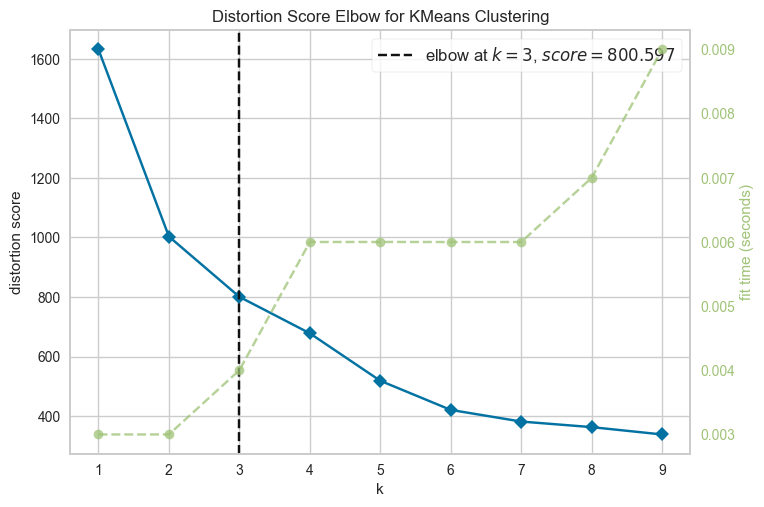

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
kmeans = KMeans(random_state=100)

# Visualisasi Elbow Method
visualizer = KElbowVisualizer(kmeans, k=(1, 10), random_state=100)

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [52]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [53]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.